In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
import os
import relative_accuracy as ra
from statistics import mean, stdev

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [4]:
import keras_tuner as kt
import MVA as ga
from keras_tuner import RandomSearch

In [5]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5.npz")['x'] 
Output_train_5 = np.load("Deep_train_5.npz")['y']

Deep_test_5   = np.load("Deep_test_5.npz")['x'] 
Output_test_5 = np.load("Deep_test_5.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15.npz")['x'] 
Output_train_15 = np.load("Deep_train_15.npz")['y']

Deep_test_15   = np.load("Deep_test_15.npz")['x'] 
Output_test_15 = np.load("Deep_test_15.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30.npz")['x'] 
Output_train_30 = np.load("Deep_train_30.npz")['y']

Deep_test_30   = np.load("Deep_test_30.npz")['x'] 
Output_test_30 = np.load("Deep_test_30.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60.npz")['x'] 
Output_train_60 = np.load("Deep_train_60.npz")['y']

Deep_test_60   = np.load("Deep_test_60.npz")['x'] 
Output_test_60 = np.load("Deep_test_60.npz")['y']

In [6]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

C:\Users\esugom\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
Test      = pd.read_csv('01test_scaled.csv', index_col=None, parse_dates=[0])

In [8]:
Test

,Timestamp,f1,f2,f3,f4,f5,f6
0,2018-02-19 00:00:00,0.154472,0.123167,0.113360,0.139159,0.091644,0.008451
1,2018-02-19 00:05:00,0.126016,0.093842,0.101215,0.114887,0.078167,0.008451
2,2018-02-19 00:10:00,0.109756,0.105572,0.074899,0.144013,0.099730,0.008451
3,2018-02-19 00:15:00,0.121951,0.073314,0.082996,0.116505,0.072776,0.008451
4,2018-02-19 00:20:00,0.138211,0.096774,0.113360,0.161812,0.110512,0.008451
...,...,...,...,...,...,...,...
4027,2018-03-04 23:35:00,0.162602,0.117302,0.139676,0.174757,0.167116,0.140845
4028,2018-03-04 23:40:00,0.134146,0.105572,0.105263,0.134304,0.110512,0.073239
4029,2018-03-04 23:45:00,0.170732,0.155425,0.089069,0.135922,0.099730,0.039437
4030,2018-03-04 23:50:00,0.150407,0.123167,0.113360,0.165049,0.099730,0.025352


## Input

#### 5 mins

In [9]:
# Train
Xt5 = Deep_train_5
yt5 = Output_train_5
# Test
Xv5 = Deep_test_5
yv5 = Output_test_5

#### 15 mins

In [10]:
# Train
Xt15 = Deep_train_15
yt15 = Output_train_15
# Test
Xv15 = Deep_test_15
yv15 = Output_test_15

#### 30 mins

In [11]:
# Train
Xt30 = Deep_train_30
yt30 = Output_train_30
# Test
Xv30 = Deep_test_30
yv30 = Output_test_30

#### 60 mins

In [12]:
# Train
Xt60 = Deep_train_60
yt60 = Output_train_60
# Test
Xv60 = Deep_test_60
yv60 = Output_test_60

# LSTM Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
# We're using 7 features in our time series samples (7 spatial locations)
n_features = 6
length = 15
val_percent = 0.07567        # 2 weeks
batch_size = 32

In [15]:
input_shape = (length, n_features)

In [16]:
from tensorflow import keras

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [17]:
stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss', 
    patience = 5,
    restore_best_weights = True)

# 5 mins ahead

In [18]:
model5 = keras.models.load_model("my_dir/6a-LSTM-5")

### Evaluation on inverse_transform

In [19]:
test_predictions5 = model5.predict((Xv5))

yv5 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv5 = yv5[15:,3]

df = Test.drop(Test.head(15).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f4'] = pd.Series(test_predictions5.flatten())

test_predictions5 = scaler.inverse_transform(df)

test_predictions5 = test_predictions5[:,3]

# MSE5 = mean_squared_error(yv5,test_predictions5)

# MAE5 = mean_absolute_error(yv5,test_predictions5)

# RMSE5 = np.sqrt(MSE5)

# MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

# eval5 = [MSE5, MAE5, RMSE5, MAPE5]
# print(eval5)

In [20]:
RA10 = ra.RA_10(np.asarray(yv5), np.asarray(test_predictions5))
RA15 = ra.RA_15(np.asarray(yv5), np.asarray(test_predictions5))
RA20 = ra.RA_20(np.asarray(yv5), np.asarray(test_predictions5))

res5 = [RA10, RA15, RA20]
print(res5)

[62.08613393079413, 78.79014189693801, 88.97186955439382]


In [21]:
GEH, num, _, _ = ga.GEH(np.asarray(yv5), np.asarray(test_predictions5))

In [22]:
x = np.arange(1,len(GEH)+1)

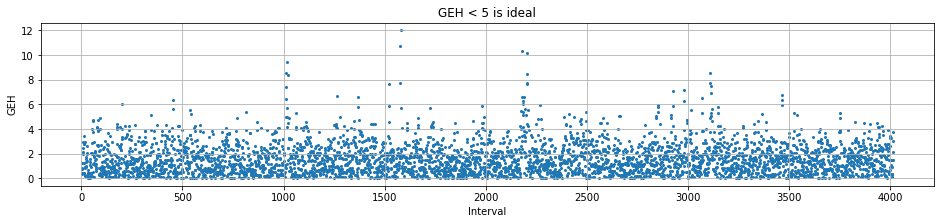

In [23]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(x, GEH, 4)
axes.set_xlabel('Interval')
axes.set_ylabel('GEH')
axes.set_title('GEH < 5 is ideal')
axes.grid()

In [24]:
GEH5 = num/len(GEH)

# 15 mins ahead

In [25]:
model15 = keras.models.load_model("my_dir/6a-LSTM-15")

### Evaluation on inverse_transform

In [26]:
test_predictions15 = model15.predict(Xv15)

yv15 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv15 = yv15[17:,3]

df = Test.drop(Test.head(17).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f4'] = pd.Series(test_predictions15.flatten())

test_predictions15 = scaler.inverse_transform(df)

test_predictions15 = test_predictions15[:,3]

# MSE15 = mean_squared_error(yv15,test_predictions15)

# MAE15 = mean_absolute_error(yv15,test_predictions15)

# RMSE15 = np.sqrt(MSE15)

# MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

# eval15 = [MSE15, MAE15, RMSE15, MAPE15]
# print(eval15)

In [27]:
RA10 = ra.RA_10(np.asarray(yv15), np.asarray(test_predictions15))
RA15 = ra.RA_15(np.asarray(yv15), np.asarray(test_predictions15))
RA20 = ra.RA_20(np.asarray(yv15), np.asarray(test_predictions15))

res15 = [RA10, RA15, RA20]
print(res15)

[57.310087173100875, 76.0398505603985, 86.99875466998755]


In [28]:
GEH, num, _, _ = ga.GEH(np.asarray(yv15), np.asarray(test_predictions15))

In [29]:
x = np.arange(1,len(GEH)+1)

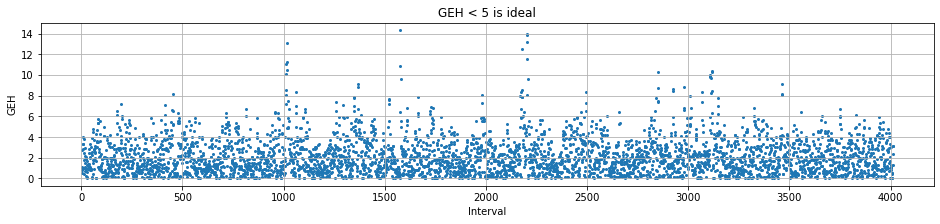

In [30]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(x, GEH, 4)
axes.set_xlabel('Interval')
axes.set_ylabel('GEH')
axes.set_title('GEH < 5 is ideal')
axes.grid()

In [31]:
GEH15 = num/len(GEH)

# 30 mins ahead

In [32]:
model30 = keras.models.load_model("my_dir/6a-LSTM-30")

### Evaluation on inverse_transform

In [33]:
test_predictions30 = model30.predict(Xv30)

yv30 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv30 = yv30[20:,3]

df = Test.drop(Test.head(20).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f4'] = pd.Series(test_predictions30.flatten())

test_predictions30 = scaler.inverse_transform(df)

test_predictions30 = test_predictions30[:,3]

# MSE30 = mean_squared_error(yv30,test_predictions30)

# MAE30 = mean_absolute_error(yv30,test_predictions30)

# RMSE30 = np.sqrt(MSE30)

# MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

# eval30 = [MSE30, MAE30, RMSE30, MAPE30]
# print(eval30)

In [34]:
RA10 = ra.RA_10(np.asarray(yv30), np.asarray(test_predictions30))
RA15 = ra.RA_15(np.asarray(yv30), np.asarray(test_predictions30))
RA20 = ra.RA_20(np.asarray(yv30), np.asarray(test_predictions30))

res30 = [RA10, RA15, RA20]
print(res30)

[55.45862412761715, 73.57926221335993, 84.42173479561316]


In [35]:
GEH, num, _, _ = ga.GEH(np.asarray(yv30), np.asarray(test_predictions30))

In [36]:
x = np.arange(1,len(GEH)+1)

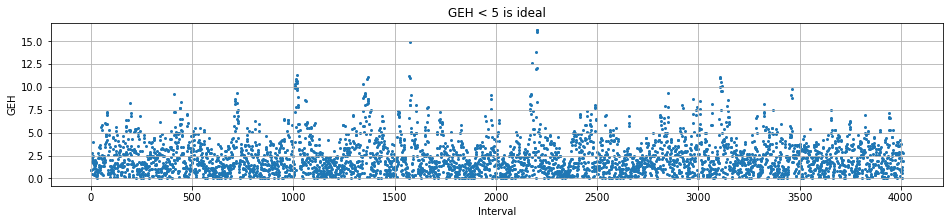

In [37]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(x, GEH, 4)
axes.set_xlabel('Interval')
axes.set_ylabel('GEH')
axes.set_title('GEH < 5 is ideal')
axes.grid()

In [38]:
GEH30 = num/len(GEH)

# 60 mins ahead

In [39]:
model60 = keras.models.load_model("my_dir/6a-LSTM-60")

### Evaluation on inverse_transform

In [40]:
test_predictions60 = model60.predict((Xv60))

yv60 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv60 = yv60[26:,3]

df = Test.drop(Test.head(26).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f4'] = pd.Series(test_predictions60.flatten())

test_predictions60 = scaler.inverse_transform(df)

test_predictions60 = test_predictions60[:,3]

# MSE60 = mean_squared_error(yv60,test_predictions60)

# MAE60 = mean_absolute_error(yv60,test_predictions60)

# RMSE60 = np.sqrt(MSE60)

# MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

# eval60 = [MSE60, MAE60, RMSE60, MAPE60]
# print(eval60)

In [41]:
RA10 = ra.RA_10(np.asarray(yv60), np.asarray(test_predictions60))
RA15 = ra.RA_15(np.asarray(yv60), np.asarray(test_predictions60))
RA20 = ra.RA_20(np.asarray(yv60), np.asarray(test_predictions60))

res60 = [RA10, RA15, RA20]
print(res60)

[51.422865701447826, 68.8467299051423, 81.1532700948577]


In [42]:
GEH, num, _, _ = ga.GEH(np.asarray(yv60), np.asarray(test_predictions60))

In [43]:
x = np.arange(1,len(GEH)+1)

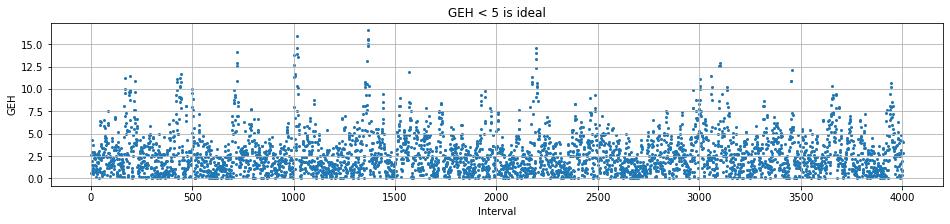

In [44]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(x, GEH, 4)
axes.set_xlabel('Interval')
axes.set_ylabel('GEH')
axes.set_title('GEH < 5 is ideal')
axes.grid()

In [45]:
GEH60 = num/len(GEH)